## Section 1: Data Sourcing

### Step 1.1: Importing necessary libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Up Visualization Style
%matplotlib inline
sns.set(style="whitegrid")

### Step 1.2: Data sourcing (From Google Drive)

In [2]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/SigmaData/Sales_data.csv")

# Inspecting the first five rows
print("Printing the first 5 rows of the dataset:")
print("-----------------------------------------------------------------------")
display(df.head(5))
print("-----------------------------------------------------------------------")

Printing the first 5 rows of the dataset:
-----------------------------------------------------------------------


,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,03-12-16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,03-12-16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


-----------------------------------------------------------------------


## Section 2: Data Preprocessing

### Step 2.1: Analyzing dataset structure

In [3]:
### Analyzing dataset structure
# Check data types
print("-----------------------------------------------------------------------")
print("Data types:")
print(df.info())
print("-----------------------------------------------------------------------")

# Check dataset shape
print("-----------------------------------------------------------------------")
print("Shape:", df.shape)
print("-----------------------------------------------------------------------")

# Check summary statistics
print("-----------------------------------------------------------------------")
print("Summary statistics:")
print(df.describe())
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Year              34866 non-null  float64
 2   Month             34866 non-null  object 
 3   Customer Age      34866 non-null  float64
 4   Customer Gender   34866 non-null  object 
 5   Country           34866 non-null  object 
 6   State             34866 non-null  object 
 7   Product Category  34866 non-null  object 
 8   Sub Category      34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit Cost         34866 non-null  float64
 11  Unit Price        34866 non-null  float64
 12  Cost              34866 non-null  float64
 13  Revenue           34867 non-null  float64
 14  Column1           2574 non-null   float64
dtypes: 

### Step 2.2: Analyzing missing vaues

In [4]:
# Show the missing values column by column
missing_values = df.isnull().sum()

print("-----------------------------------------------------------------------")
print("Missing values by column:\n", missing_values)
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Missing values by column:
 Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64
-----------------------------------------------------------------------


### Step 2.3: Handling missing values

#### Step 2.3.1: Dropping column 'Column1'

In [5]:
# Lets drop column 'Column1' since it has NaN in most rows
# Checking dataset shape before the column is dropped
print("-----------------------------------------------------------------------")
print("Shape before dropping 'Column1':", df.shape)
print("-----------------------------------------------------------------------")

df_clean = df.drop('Column1', axis=1)

# Checking dataset shape after the column is dropped
print("-----------------------------------------------------------------------")
print("Shape after dropping 'Column1':", df_clean.shape)
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Shape before dropping 'Column1': (34867, 15)
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Shape after dropping 'Column1': (34867, 14)
-----------------------------------------------------------------------


#### Step 2.3.2: Dropping missing rows

In [6]:
# Lets drop the missing rows since it is one for each column except for 'Revenue' and 'Column1' columns
# Checking dataset shape before the empty row(s) is dropped
print("-----------------------------------------------------------------------")
print("Shape before dropping empty rows:", df_clean.shape)
print("-----------------------------------------------------------------------")

df_dataset = df_clean.dropna()

# Checking dataset shape after the empty row(s) is dropped
print("-----------------------------------------------------------------------")
print("Shape after dropping empty rows:", df_clean.shape)
print("-----------------------------------------------------------------------")

# Checking dataset summary after the empty row(s) is dropped
print("-----------------------------------------------------------------------")
df_dataset.info()
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Shape before dropping empty rows: (34867, 14)
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Shape after dropping empty rows: (34867, 14)
-----------------------------------------------------------------------
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Year              34866 non-null  float64
 2   Month             34866 non-null  object 
 3   Customer Age      34866 non-null  float64
 4   Customer Gender   34866 non-null  object 
 5   Country           34866 non-null  object 
 6   State             34866 non-null  object 
 7   Product Category 

### Step 2.4: Handling duplicate values

In [7]:
# Counting the number of the duplicate rows
duplicate_count = df_dataset.duplicated().sum()
print("-----------------------------------------------------------------------")
print("Number of duplicate rows:", duplicate_count)
print("-----------------------------------------------------------------------")

# Removing the duplicated rows
df_dataset = df_dataset.drop_duplicates()
print("-----------------------------------------------------------------------")
print("Shape after dropping duplicates:", df_dataset.shape)
print("-----------------------------------------------------------------------")

# Checking dataset summary after dropping duplicate row(s)
print("-----------------------------------------------------------------------")
df_dataset.info()
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Number of duplicate rows: 1
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Shape after dropping duplicates: (34865, 14)
-----------------------------------------------------------------------
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 34865 entries, 0 to 34865
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34865 non-null  object 
 1   Year              34865 non-null  float64
 2   Month             34865 non-null  object 
 3   Customer Age      34865 non-null  float64
 4   Customer Gender   34865 non-null  object 
 5   Country           34865 non-null  object 
 6   State             34865 non-null  object 
 7   Product Category  34865 non-null  o

### Step 2.5: Feature Engineering

#### Step 2.5.1: Feature 1: Profit per transaction

In [8]:
# Feature 1: Profit_per_Transaction
df_dataset['Profit_per_Transaction'] = df_dataset['Revenue'] - df_dataset['Cost']

# Checking dataset summary after new feature 1
print("-----------------------------------------------------------------------")
df_dataset.info()
print("-----------------------------------------------------------------------")

# Checking dataset head
print("-----------------------------------------------------------------------")
print(df_dataset.head(3))
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 34865 entries, 0 to 34865
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    34865 non-null  object 
 1   Year                    34865 non-null  float64
 2   Month                   34865 non-null  object 
 3   Customer Age            34865 non-null  float64
 4   Customer Gender         34865 non-null  object 
 5   Country                 34865 non-null  object 
 6   State                   34865 non-null  object 
 7   Product Category        34865 non-null  object 
 8   Sub Category            34865 non-null  object 
 9   Quantity                34865 non-null  float64
 10  Unit Cost               34865 non-null  float64
 11  Unit Price              34865 non-null  float64
 12  Cost                    34865 non-null  float64
 13  Revenue                 

#### Step 2.5.2: Feature 2: Profit Margin

In [9]:
# Feature 2: Profit_Margin
df_dataset['Profit_Margin'] = (df_dataset['Profit_per_Transaction'] / df_dataset['Revenue']) * 100

# Checking dataset summary after new feature 2
print("-----------------------------------------------------------------------")
df_dataset.info()
print("-----------------------------------------------------------------------")

# Checking dataset head
print("-----------------------------------------------------------------------")
print(df_dataset.head(3))
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 34865 entries, 0 to 34865
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    34865 non-null  object 
 1   Year                    34865 non-null  float64
 2   Month                   34865 non-null  object 
 3   Customer Age            34865 non-null  float64
 4   Customer Gender         34865 non-null  object 
 5   Country                 34865 non-null  object 
 6   State                   34865 non-null  object 
 7   Product Category        34865 non-null  object 
 8   Sub Category            34865 non-null  object 
 9   Quantity                34865 non-null  float64
 10  Unit Cost               34865 non-null  float64
 11  Unit Price              34865 non-null  float64
 12  Cost                    34865 non-null  float64
 13  Revenue                 

#### Step 2.5.3: Feature 3: Age Groups

In [10]:
# Feature 3: Age_Group
# Define the age groups, assuming "Customer_Age" column exists
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
age_bins = [0, 18, 25, 35, 45, 55, 65, np.inf]  # np.inf to cover any age 65+
df_dataset['Age_Group'] = pd.cut(df_dataset['Customer Age'], bins=age_bins, labels=age_labels, right=False)

# Checking dataset summary after new feature 3
print("-----------------------------------------------------------------------")
df_dataset.info()
print("-----------------------------------------------------------------------")

# Checking dataset head
print("-----------------------------------------------------------------------")
print(df_dataset.head(3))
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 34865 entries, 0 to 34865
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Date                    34865 non-null  object  
 1   Year                    34865 non-null  float64 
 2   Month                   34865 non-null  object  
 3   Customer Age            34865 non-null  float64 
 4   Customer Gender         34865 non-null  object  
 5   Country                 34865 non-null  object  
 6   State                   34865 non-null  object  
 7   Product Category        34865 non-null  object  
 8   Sub Category            34865 non-null  object  
 9   Quantity                34865 non-null  float64 
 10  Unit Cost               34865 non-null  float64 
 11  Unit Price              34865 non-null  float64 
 12  Cost                    34865 non-null  float64 
 13  Revenue  

## Section 3: Exploratory Data Analysis

### Step 3.1: Basic data exploartion

In [11]:
# General overview of data
# Checking dataset shape
print("-----------------------------------------------------------------------")
print("Dataset dimensions:", df_dataset.shape)
print("-----------------------------------------------------------------------")

# Checking dataset summary
print("-----------------------------------------------------------------------")
print(df_dataset.info())
print("-----------------------------------------------------------------------")

# Checking dataset statistics
print("-----------------------------------------------------------------------")
print(df_dataset.describe())
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Dataset dimensions: (34865, 17)
-----------------------------------------------------------------------
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 34865 entries, 0 to 34865
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Date                    34865 non-null  object  
 1   Year                    34865 non-null  float64 
 2   Month                   34865 non-null  object  
 3   Customer Age            34865 non-null  float64 
 4   Customer Gender         34865 non-null  object  
 5   Country                 34865 non-null  object  
 6   State                   34865 non-null  object  
 7   Product Category        34865 non-null  object  
 8   Sub Category            34865 non-null  object  
 9   Quantity                34865 non-null  float64 


##### Observation:
> The minimum `Revenue` is above zero. This means the business has stayed afloat even in difficult economic times.

##### Insight:
> Diversification of the product line can help neutralize the losses of one product type.

### Step 3.2: Measures of central tendency

In [12]:
# Lets explore the mean, median and mode for columns 'Cost' and 'Revenue'

# Central Tendencies - Cost column
cost_mean = df_dataset['Cost'].mean()
cost_median = df_dataset['Cost'].median()
cost_mode = df_dataset['Cost'].mode()[0]

# Central Tendencies - Revenue column
revenue_mean = df_dataset['Revenue'].mean()
revenue_median = df_dataset['Revenue'].median()
revenue_mode = df_dataset['Revenue'].mode()[0]

print("-----------------------------------------------------------------------")
print("*Cost :: Central Tendecies:* \nMean: {:.2f}, \nMedian: {:.2f}, \nMode: {:.2f}".format(cost_mean, cost_median, cost_mode))
print("-----------------------------------------------------------------------")

print("-----------------------------------------------------------------------")
print("*Revenue :: Central Tendecies:* \nMean: {:.2f}, \nMedian: {:.2f}, \nMode: {:.2f}".format(revenue_mean, revenue_median, revenue_mode))
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
*Cost :: Central Tendecies:* 
Mean: 576.02, 
Median: 261.00, 
Mode: 540.00
-----------------------------------------------------------------------
-----------------------------------------------------------------------
*Revenue :: Central Tendecies:* 
Mean: 640.89, 
Median: 319.00, 
Mode: 6.00
-----------------------------------------------------------------------


##### Observation:
> The average `Revenue` is higher than the `Cost`.

##### Insight:
> This business is profitable.

### Step 3.3: Distribution plot (Histogram) - Customer Age

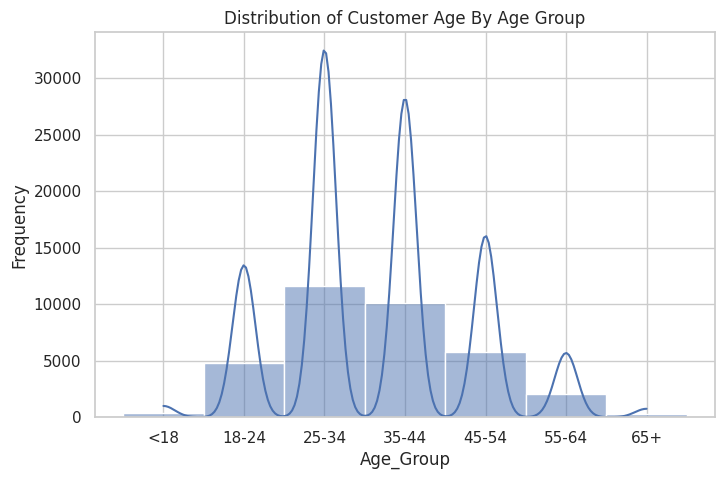

In [13]:
# Distribution of Customer_Age - Histogram Plot
plt.figure(figsize=(8, 5))
sns.histplot(df_dataset['Age_Group'], bins=7, kde=True)
plt.title('Distribution of Customer Age By Age Group')
plt.xlabel('Age_Group')
plt.ylabel('Frequency')
plt.show()

##### Observation:
> The `Age Group` between `25-34` years forms the majority of the `Customers By Age`. It is followed by the `Age Group` between `35-44` years

##### Insight:
> Since these two age groups form the bulk of the customers, the target of ads and sales campaigns should be focused at them.

### Step 3.4: Correlation Analysis - Numerical Columns

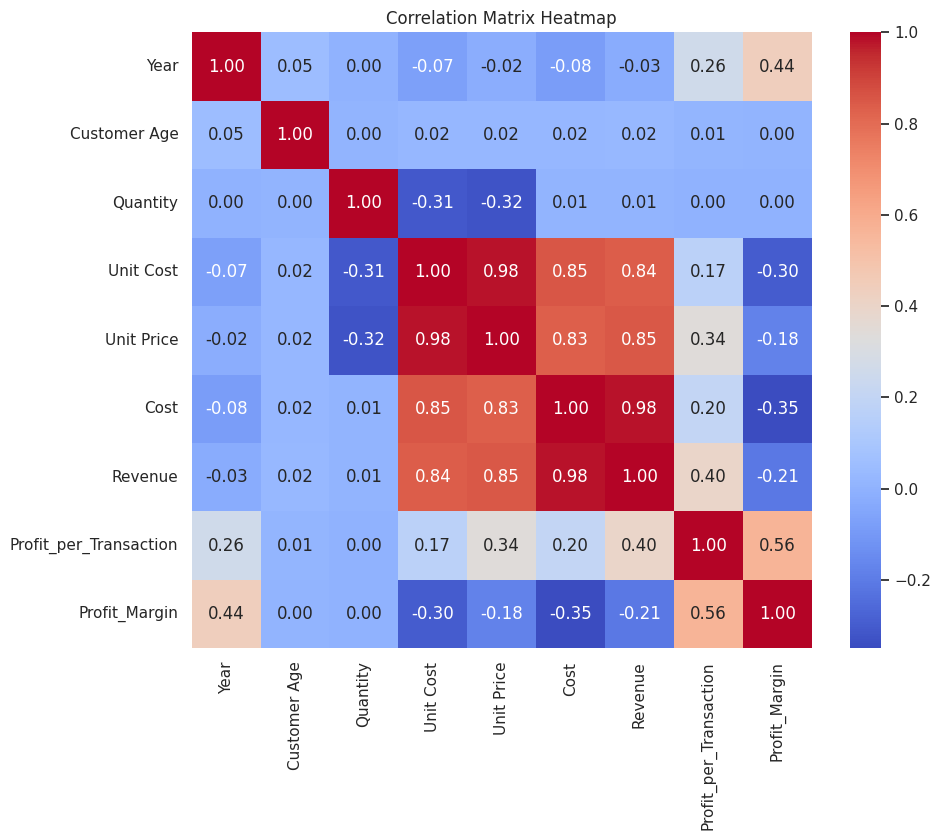

In [14]:
# Compute correlation matrix for numerical columns
# Selecting only numerical columns before computing the correlation matrix
numerical_df = df_dataset.select_dtypes(include=np.number)
corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

##### Observation:
> There is a strong positive correlation between `Cost` and `Revenue`.

##### Insight:
> This business will make higher profits as it invests more in its stock.

### Step 3.5: Univariate Analysis - Box Plot

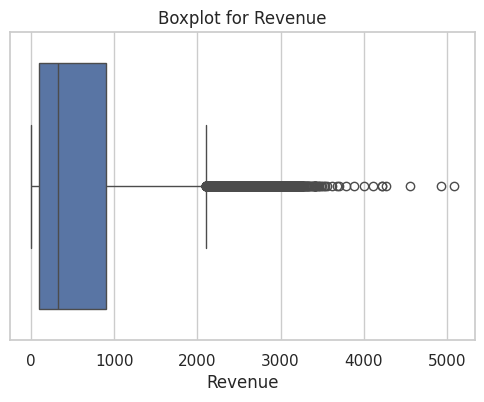

In [15]:
# Analysis - Boxplot for Revenue
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_dataset['Revenue'])
plt.title('Boxplot for Revenue')
plt.show()

##### Observation:
> Even though `50%` the `Revenue` is mostly between `2` and `902` and the median is below `500`, there are a lot of outliers in revenue generation, spanning slightly over `5000`.

##### Insight:
> This business has an untapped potential. It could generate more profits, if the outlier products were identified and advertised aggressively to the many customer age groups.

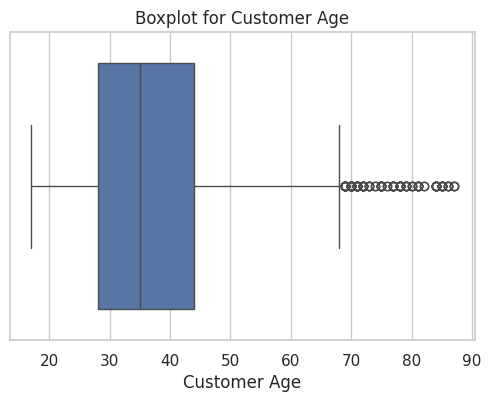

In [16]:
# Analysis - Boxplot for Customer Age
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_dataset['Customer Age'])
plt.title('Boxplot for Customer Age')
plt.show()

##### Observation:
> Most customers age is between `25` and `44`.

##### Insight:
> Customers aged between `25` and `44` years form 50% of the customer base.

### Step 3.6: Bivariate Analysis - Scatter Plot

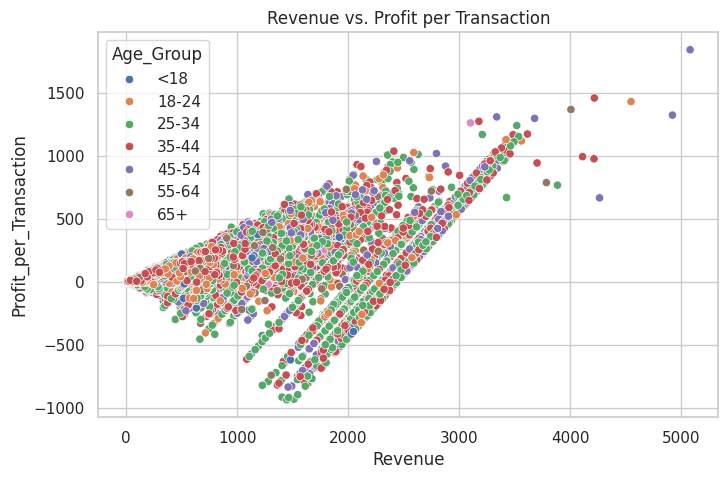

In [17]:
# Analysis - Scatterplot for Revenue vs Profit_per_Transaction
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_dataset, x='Revenue', y='Profit_per_Transaction', hue='Age_Group')
plt.title('Revenue vs. Profit per Transaction')
plt.show()

##### Observation:
> Customers aged between `25` and `34` contribute the most `Profit per transaction` for every purchase. This relationship is strongly linear as opposed to other age groups.

##### Insight:
> Growing the number of customers aged between `25` and `34` years will positively improve the revenue yield for the business in a linear manner at the very least.

### Step 3.7: Multivariate Analysis - Pair Plot

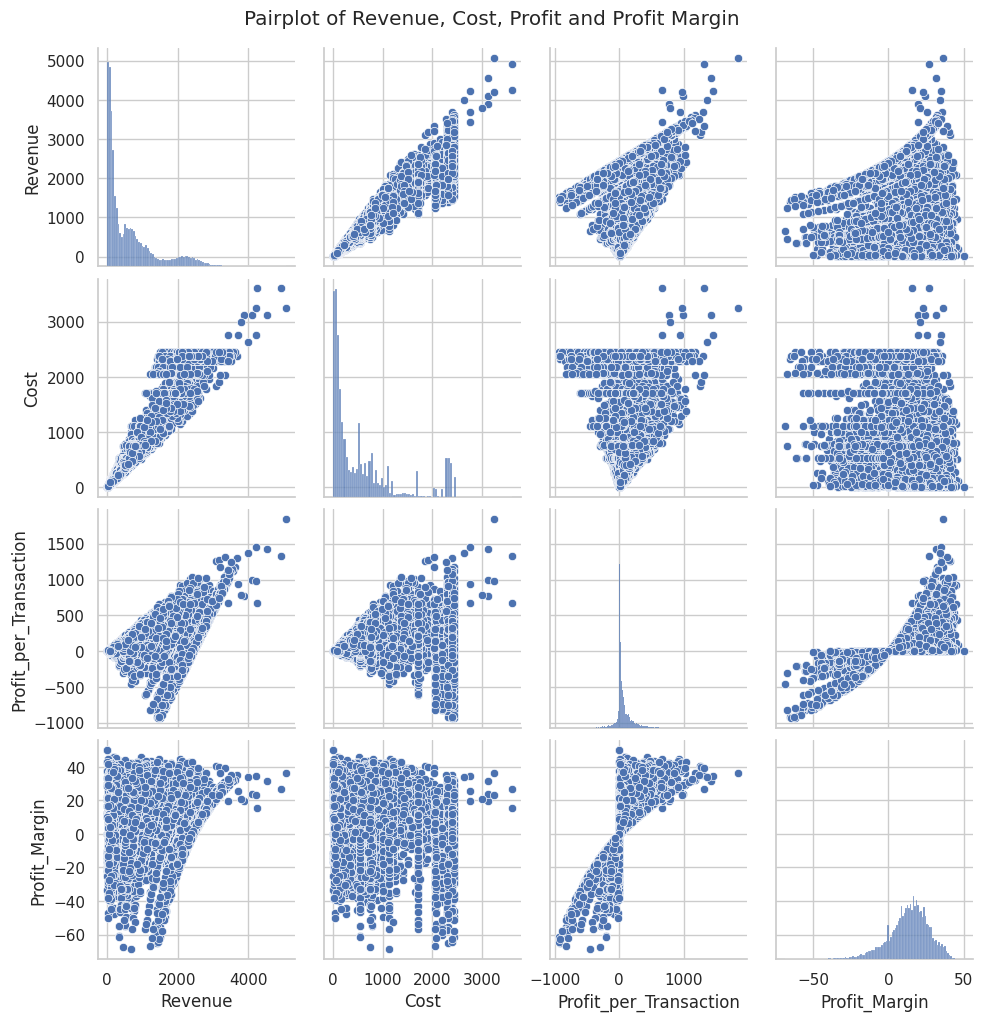

In [18]:
# Analysis - Pairplot for selected features: Revenue vs Cost vs Profit_per_Transaction vs Profit_Margin
selected_cols = ['Revenue', 'Cost', 'Profit_per_Transaction', 'Profit_Margin']
sns.pairplot(df_dataset[selected_cols])
plt.suptitle("Pairplot of Revenue, Cost, Profit and Profit Margin", y=1.02)
plt.show()

##### Observation:
> Mostly, `Revenue` and `Cost` are strongly positively correlated.

##### Insight:
> An investment in the business stock will generally drive the `Revenue` in a positive direction.

## Section 4: Data Visualization: Revenue Metrics Analysis

### Step 4.1: Revenue Trend Over Time (Month on Month)

/tmp/ipython-input-1850180477.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dataset['Date'] = pd.to_datetime(df_dataset['Date'])


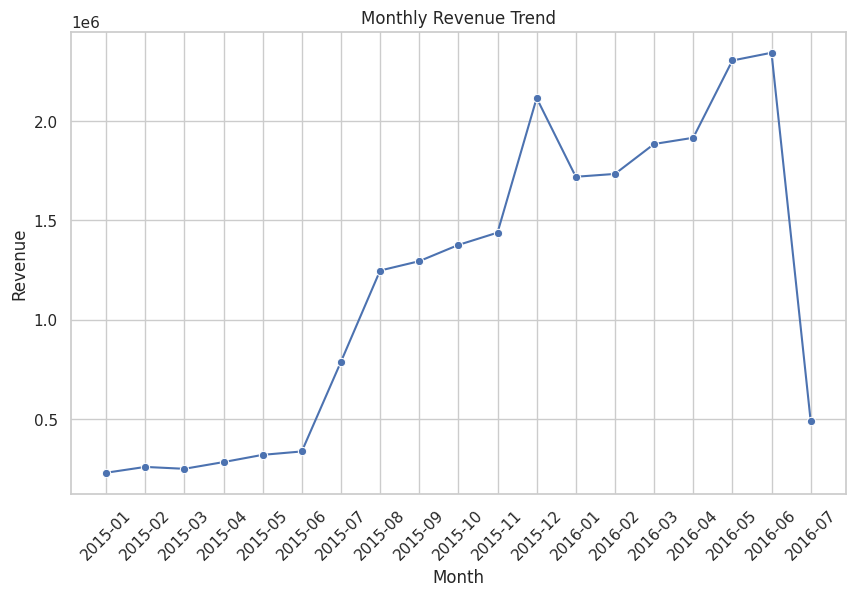

In [19]:
# Covert 'Order_Date' is in datetime format
df_dataset['Date'] = pd.to_datetime(df_dataset['Date'])

# Create a new column for Month (e.g., '2025-05')
df_dataset['Month'] = df_dataset['Date'].dt.to_period('M')

# Aggregate Revenue by Month
monthly_revenue = df_dataset.groupby('Month')['Revenue'].sum().reset_index()

# Convert Month back to string for plotting
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

##### Observation:
> From `January 2015` to `June 2016`, the revenue has grown positively and by a factor of about 5 times.

##### Insight:
> The business `Revenue` s likely to keep growing positively in the future, if the business keeps expanding.

### Step 4.2: Revenue by Product Category

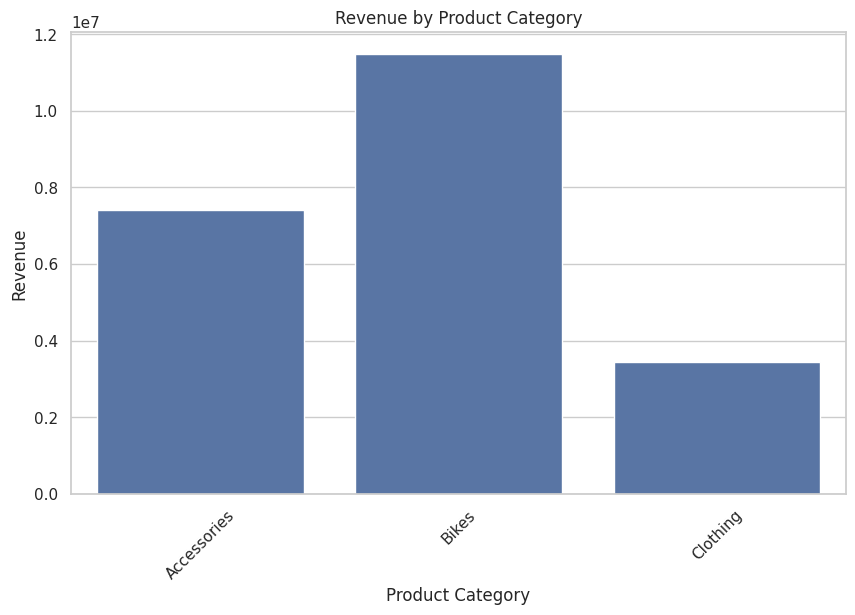

In [20]:
# Aggregate Revenue by Product Category (assumes column 'Product_Category' exists)
category_revenue = df_dataset.groupby('Product Category')['Revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Revenue', data=category_revenue)
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

##### Observation:
> `Bikes` category of all the products froms the majority of the business `Revenue`.

##### Insight:
> Increasing the sales of the `Bike` category will improve the overall business `Revenue`.

### Step 4.3: Revenue by Age Group

/tmp/ipython-input-1617563473.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_revenue = df_dataset.groupby('Age_Group')['Revenue'].sum().reset_index()


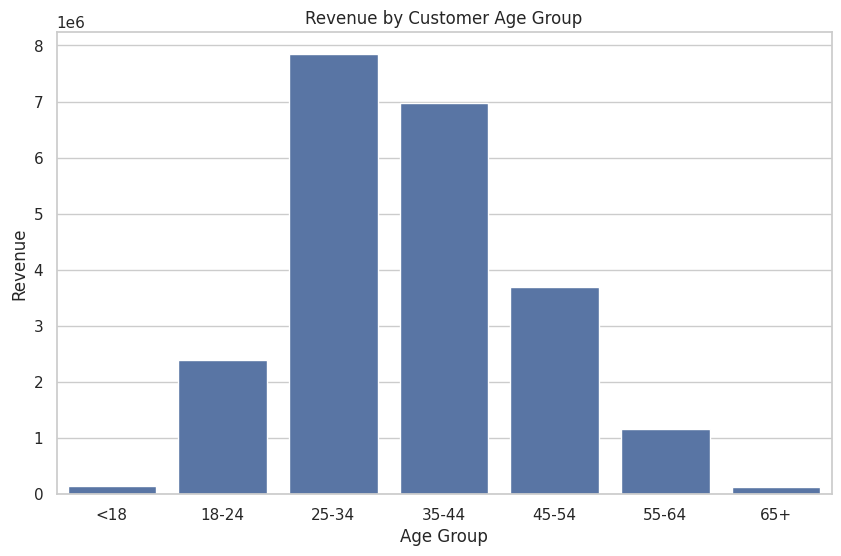

In [21]:
# Aggregate Revenue by Age Group
age_group_revenue = df_dataset.groupby('Age_Group')['Revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Revenue', data=age_group_revenue)
plt.title('Revenue by Customer Age Group')
plt.xlabel('Age Group')
plt.ylabel('Revenue')
plt.show()

##### Observation:
> Most `Revenue` comes from customers aged between `25` and `34` years. This group is followed by customers aged between `35` and `44` years.

##### Insight:
> 50% of the business `Revenue` comes only from two age groups `25 and 34` years and `35 and 44` years.

### Step 4.4: Revenue vs. Profit Relationship

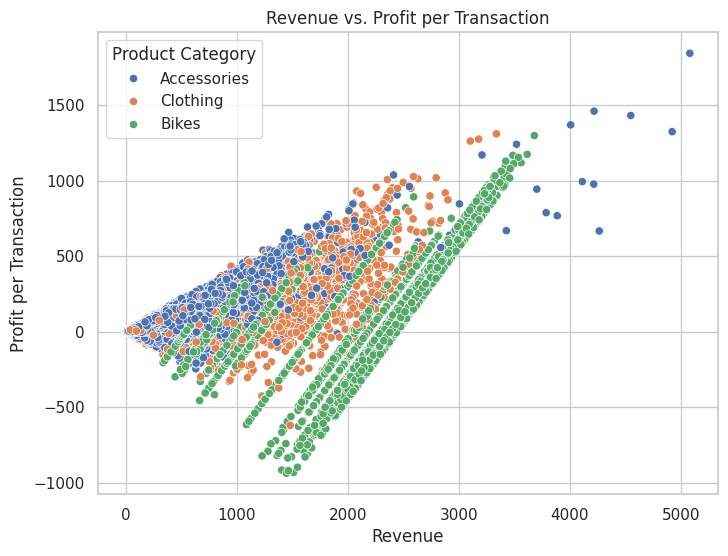

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_dataset, x='Revenue', y='Profit_per_Transaction', hue='Product Category')
plt.title('Revenue vs. Profit per Transaction')
plt.xlabel('Revenue')
plt.ylabel('Profit per Transaction')
plt.show()

##### Observation:
> The `Bikes` category has a strong positive linear contribution to the overall busines `Revenue`. Other categories do not have the same.

##### Insight:
> Other categories such as `Accessories` and `Clothing` do not have clear linear relationship to the business revenue. This means that increasing the stock of these categories does not directly increase the business `Revenue`.

### Step 4.5: Revenue by Country (Top 10)

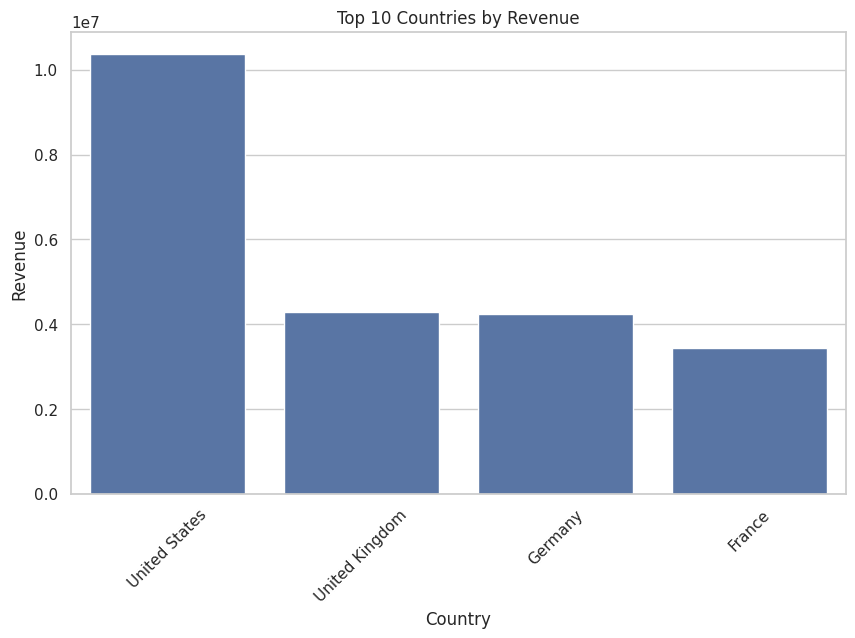

In [23]:
# Aggregate Revenue by Country (assumes a "Country" column exists)
country_revenue = df_dataset.groupby('Country')['Revenue'].sum().reset_index()

# Get Top 10 countries by revenue
top10_countries = country_revenue.nlargest(10, 'Revenue')

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Revenue', data=top10_countries)
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

##### Observation:
> `United States` generates the most `Revenue` for the business. Its `Revenue` contribution doubles the second largest contributor, which is `United Kingdom`.

##### Insight:
> Expanding the business in the `United States` will positively increase the business `Revenue`.

## Section 5: Observations and Insights

##### 5.1: Revenue Trend Over Time:

*Observation:*
> Revenue peaks in specific months such as on December in 2015 and in June 2016, this indicates seasonal buying behavior.

*Insight:*
> The business should `consider ramping up marketing efforts before and during these peak months` so as to grow the profir margins for these peak periods.

##### 5.2: Revenue by Product Category:

*Observation:*
> One category, specifically, the `Bikes` category dominate sales.

*Insight:*
> `Allocating more resources` to the `Bikes` top-performing category will lead to sales and hence revenue improvement.

##### 5.3: Revenue vs. Profit Relationship:

*Observation:* There are clusters indicating low revenue but high profit margins, suggesting premium pricing on specific products.

*Insight:* Explore why certain products yield high margins and whether the pricing model can be applied to other categories.

## Section 6: Data Export - CSV File

In [24]:
# Exporting the final dataset to a CSV file
df_dataset.to_csv('final_sales_data.csv', index=False)

print("Final data exported successfully!")

Final data exported successfully!
